## <u>Preface:</u>

The goal of this jupyter notebook is to find some concrete "criterias", that strongly influence the probability for a passenger to survive.
With those criterias and paired with a tensorflow model, the goal is to determine, wether or not a given person would survive the titanic accident.

The training data set was provided from kaggle: https://www.kaggle.com/competitions/titanic

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
# Helper Functions

def toPercent(value):
    return round(round(value,3)*100,1)

In [117]:
file = "Data/train.csv"

df = pd.read_csv(file, sep = ",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### <u>Criteria List:</u>

- PassengerId (should not be relevant for the analysis)
- Ticket Number (probably no correlation with survival probability)<br>
<br>
- [Passenger Class (First, Second, Third)](#udoes-the-passenger-class-influence-the-odd-of-survivingu)
- [Sex](#u-did-gender-influence-the-odd-of-survivingu)
- [Age](#u-does-the-age-of-a-passenger-influence-its-survival-oddu)
- Number of siblings/spouses on Titanic
- Number of parents/children on Titanic
- Fare (Price paid)
- Cabin Number (Not always existent)
- Embarkation Port (C = Cherbourg, Q = Queenstown, S = Southampton)

For each of the given criterias, there will be a statistical analysis and afterwards a possible explanation for that outcome.

Although all of those criterias can be seen individualy, it makes sense to combine some of then additionaly, as for example:
- Age and gender (to take into account male and female children)
- Gender and passenger class (Rich men compared to "poor" female)

From a historical point of view, we know for example that people from first and second class had a shorter  "way" to the rescue boats. Those additional thoughts will be analysed in a separate paragraph at the end.

##### <u>Basic Information</u>

In [118]:
firstClass= df[df.Pclass == 1]
secondClass = df[df.Pclass == 2]
thirdClass = df[df.Pclass == 3]

totalPassengers = df.shape[0]

passengersDead = df[df["Survived"] == 0]
passengersAlive = df[df["Survived"] == 1]

print(f"First class: {firstClass.shape[0]}\nSecond class: {secondClass.shape[0]}\nThird class: {thirdClass.shape[0]}\nTotal: {totalPassengers}\n")

print(f"Passengers Survived:{passengersAlive.shape[0]}\nPassengers Dead:{passengersDead.shape[0]}")


First class: 216
Second class: 184
Third class: 491
Total: 891

Passengers Survived:342
Passengers Dead:549


##### <u>Does the passenger class influence the odd of surviving?</u>

In [119]:
firstClassDead = df[(df["Pclass"] == 1) & (df["Survived"] == 0)]
firstClassAlive = df[(df["Pclass"] == 1) & (df["Survived"] == 1)]
firstClassSurvivalRatio = firstClassAlive.shape[0]/firstClass.shape[0]

print(f"First class died: {firstClassDead.shape[0]}\nFirst class survived: {firstClassAlive.shape[0]}\nSurvival Ratio: {toPercent(firstClassSurvivalRatio)}%")

First class died: 80
First class survived: 136
Survival Ratio: 63.0%


In [120]:
secondClassDead = df[(df["Pclass"] == 2) & (df["Survived"] == 0)]
secondClassAlive = df[(df["Pclass"] == 2) & (df["Survived"] == 1)]
secondClassSurvivalRatio = secondClassAlive.shape[0]/secondClass.shape[0]

print(f"Second class died: {secondClassDead.shape[0]}\nSecond class survived: {secondClassAlive.shape[0]}\nSurvival Ratio: {toPercent(secondClassSurvivalRatio)}%")

Second class died: 97
Second class survived: 87
Survival Ratio: 47.3%


In [121]:
thirdClassDead = df[(df["Pclass"] == 3) & (df["Survived"] == 0)]
thirdClassAlive = df[(df["Pclass"] == 3) & (df["Survived"] == 1)]
thirdClassSurvivalRatio = thirdClassAlive.shape[0]/thirdClass.shape[0]

print(f"Third class died: {thirdClassDead.shape[0]}\nThird class survived: {thirdClassAlive.shape[0]}\nSurvival Ratio: {toPercent(thirdClassSurvivalRatio)}%")

Third class died: 372
Third class survived: 119
Survival Ratio: 24.2%


The higher the class the passenger is in, the higher the odd of surviving is. The result is not that surprising, as first class probably had earlier access to rescue boats.

Buying a first class ticket earns you a 63% survivability probabilty. This value is reduced to sligthly under 50% (47.3%) for second class. Third class passengers only had a marginal survival odd, about 25% (24.2%).

This "criteria" is a fast way to estimate the odds for a person of a given class to survive (scaled to an infinite amount of person as there will be some deviation observed for a small amout of people).

It is also interesting to keep in mind that the sample for first and second class is way smaller than third class. 

<BarContainer object of 9 artists>

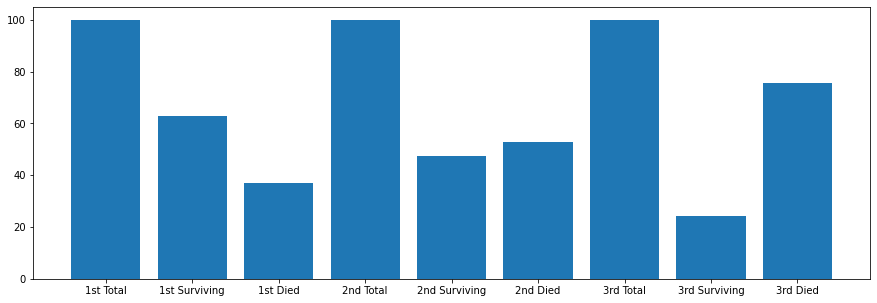

In [122]:

values = [elem*100 for elem in [1,firstClassSurvivalRatio,1-firstClassSurvivalRatio, 1, secondClassSurvivalRatio, 1-secondClassSurvivalRatio, 1, thirdClassSurvivalRatio, 1-thirdClassSurvivalRatio]]

plt.figure(figsize=(15, 5))
plt.bar(["1st Total","1st Surviving","1st Died","2nd Total","2nd Surviving","2nd Died","3rd Total","3rd Surviving","3rd Died"], values)

##### <u> Did gender influence the odd of surviving?</u>

This question is indeed a bit more complex as a pure look at the gender may be missleading. Often:

- kids (not matter the gender)
- women 

have priority on the rescute boat. Therefore, the gender question will be treated in this category standalone and [later on while taking into account the age too.]()

In [123]:
malePassengers = df[df.Sex == "male"]
maleRatio = malePassengers.shape[0]/totalPassengers

maleDead = df[(df["Sex"] == "male") & (df["Survived"] == 0)]
maleAlive = df[(df["Sex"] == "male") & (df["Survived"] == 1)]
maleSurvivalRatio = maleAlive.shape[0] / malePassengers.shape[0]

femalePassengers = df[df.Sex == "female"]
femaleRatio = femalePassengers.shape[0]/totalPassengers

femaleDead = df[(df["Sex"] == "female") & (df["Survived"] == 0)]
femaleAlive = df[(df["Sex"] == "female") & (df["Survived"] == 1)]
femaleSurvivalRatio = femaleAlive.shape[0] / femalePassengers.shape[0]

print(f"Male passenger count: {malePassengers.shape[0]}\n\
Male passenger ratio: {toPercent(maleRatio)}%\n\
Male passenger survived: {maleAlive.shape[0]}\n\
Male passenger dead: {maleDead.shape[0]}\n\
Male survival ratio: {toPercent(maleSurvivalRatio)}%\n\n\
\
Female passenger count: {femalePassengers.shape[0]}\n\
Female passenger ratio: {toPercent(femaleRatio)}%\n\
Female passenger survived: {femaleAlive.shape[0]}\n\
Female passenger dead: {femaleDead.shape[0]}\n\
Female survival ratio: {toPercent(femaleSurvivalRatio)}%")

Male passenger count: 577
Male passenger ratio: 64.8%
Male passenger survived: 109
Male passenger dead: 468
Male survival ratio: 18.9%

Female passenger count: 314
Female passenger ratio: 35.2%
Female passenger survived: 233
Female passenger dead: 81
Female survival ratio: 74.2%


From that data, we see that:

1) There were more men than women on board of the titanic (irrelevant for prediction)
2) Way less men survived (19%) compared to women (74%). Those numbers show that women indeed probably got saved from the titanic before men, regardless of their class.

From this point on, there is an obvious question. Where the "rare" saved mens children, rich people or just random people who got a place on a rescue boat?

<BarContainer object of 6 artists>

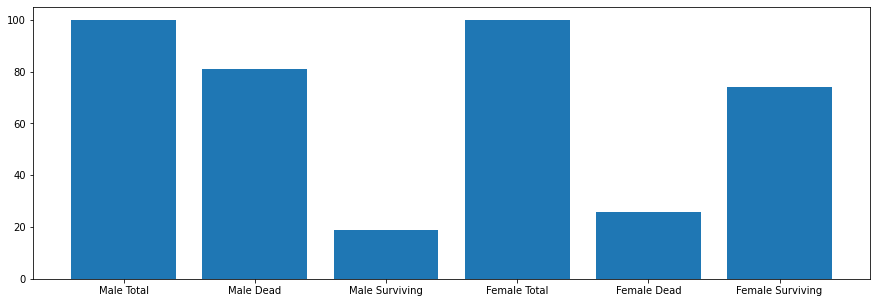

In [124]:
values = [elem*100 for elem in [1,1-maleSurvivalRatio,maleSurvivalRatio, 1, 1-femaleSurvivalRatio, femaleSurvivalRatio]]

plt.figure(figsize=(15, 5))
plt.bar(["Male Total","Male Dead","Male Surviving","Female Total","Female Dead","Female Surviving"], values)

##### <u> Does the age of a passenger influence its survival odd?</u>

Similar to the gender, children and women had priority. Therefore, among the "small" amount of male individuals who survived, were those rather kids or adults (for example rich people -> will be analysed later on).

All passengers:

In [125]:
# No matter dead or alive
agesMixed = df["Age"].unique()
agesMixed = agesMixed[~np.isnan(agesMixed)]
counterMixed = [df[df.Age == val].shape[0] for val in agesMixed]

ageMales = malePassengers["Age"].unique()
ageMales = ageMales[~np.isnan(ageMales)]
counterMale = [df[(df["Age"] == val) & (df["Sex"] == "male")].shape[0] for val in ageMales]

ageFemale = femalePassengers["Age"].unique()
ageFemale = ageFemale[~np.isnan(ageFemale)]
counterFemale = [df[(df["Age"] == val) & (df["Sex"] == "female")].shape[0] for val in ageFemale]

Text(0.5, 1.0, 'Females')

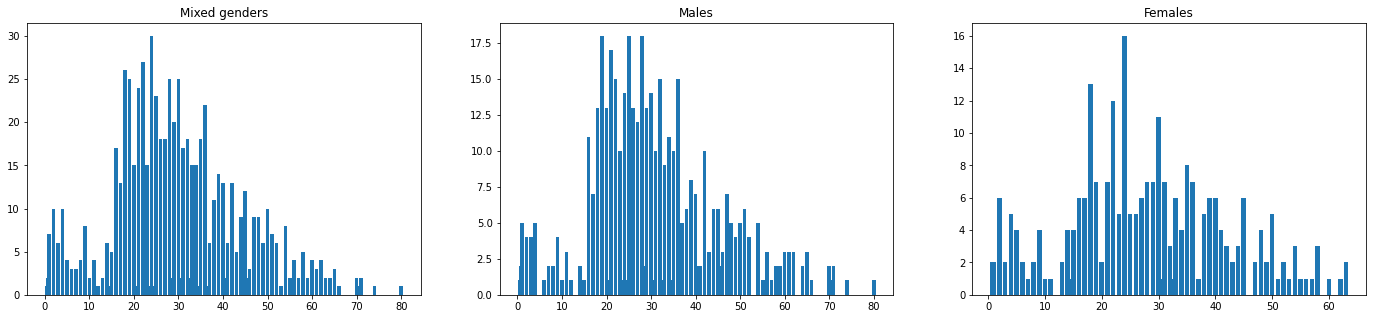

In [126]:
plt.figure(figsize=(24, 5))
plt.subplot(131)
plt.bar(agesMixed, counterMixed)
plt.title("Mixed genders")
plt.subplot(132)
plt.bar(ageMales, counterMale)
plt.title("Males")
plt.subplot(133)
plt.bar(ageFemale, counterFemale)
plt.title("Females")

Dead passengers only:

In [127]:
# Dead only
deads = df[df.Survived == 0]
agesMixedDead = deads["Age"].unique()
agesMixedDead = agesMixedDead[~np.isnan(agesMixedDead)]
counterMixedDead = [deads[deads.Age == val].shape[0] for val in agesMixedDead]

deadMales = df[(df.Survived == 0) & (df.Sex == "male")]
ageMalesDead = deadMales["Age"].unique()
ageMalesDead = ageMalesDead[~np.isnan(ageMalesDead)]
counterMaleDead = [deads[(deads["Age"] == val) & (deads["Sex"] == "male")].shape[0] for val in ageMalesDead]

deadFemales = df[(df.Survived == 0) & (df.Sex == "female")]
ageFemaleDead = deadFemales["Age"].unique()
ageFemaleDead = ageFemaleDead[~np.isnan(ageFemaleDead)]
counterFemaleDead = [deads[(deads["Age"] == val) & (deads["Sex"] == "female")].shape[0] for val in ageFemaleDead]

Text(0.5, 1.0, 'Females')

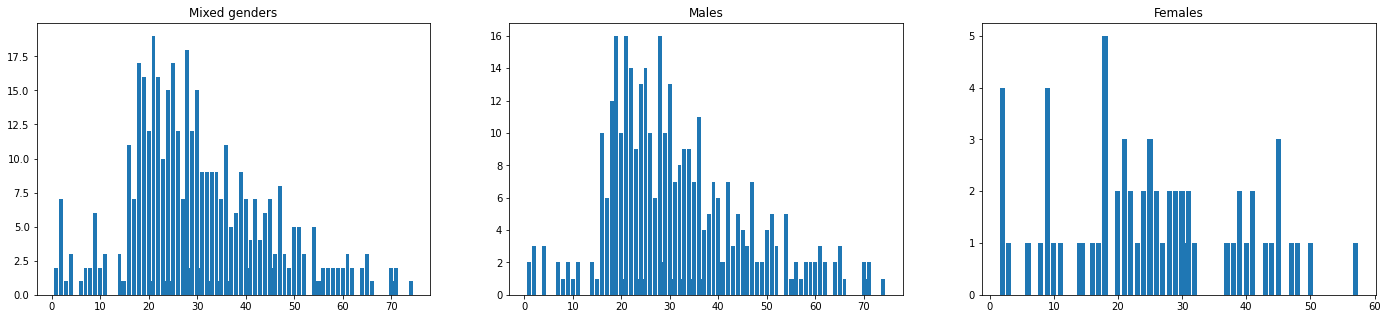

In [128]:
plt.figure(figsize=(24, 5))
plt.subplot(131)
plt.bar(agesMixedDead, counterMixedDead)
plt.title("Mixed genders")
plt.subplot(132)
plt.bar(ageMalesDead, counterMaleDead)
plt.title("Males")
plt.subplot(133)
plt.bar(ageFemaleDead, counterFemaleDead)
plt.title("Females")

Alive passengers only:

In [129]:
# Alive only
alive = df[df.Survived == 1]
agesMixedAlive = alive["Age"].unique()
agesMixedAlive = agesMixedAlive[~np.isnan(agesMixedAlive)]
counterMixedAlive = [alive[alive.Age == val].shape[0] for val in agesMixedAlive]

aliveMales = df[(df.Survived == 0) & (df.Sex == "male")]
ageMalesAlive = aliveMales["Age"].unique()
ageMalesAlive = ageMalesAlive[~np.isnan(ageMalesAlive)]
counterMaleAlive = [alive[(alive["Age"] == val) & (alive["Sex"] == "male")].shape[0] for val in ageMalesAlive]

aliveFemales = df[(df.Survived == 0) & (df.Sex == "female")]
ageFemaleAlive = aliveFemales["Age"].unique()
ageFemaleAlive = ageFemaleAlive[~np.isnan(ageFemaleAlive)]
counterFemaleAlive = [alive[(alive["Age"] == val) & (alive["Sex"] == "female")].shape[0] for val in ageFemaleAlive]

Text(0.5, 1.0, 'Females')

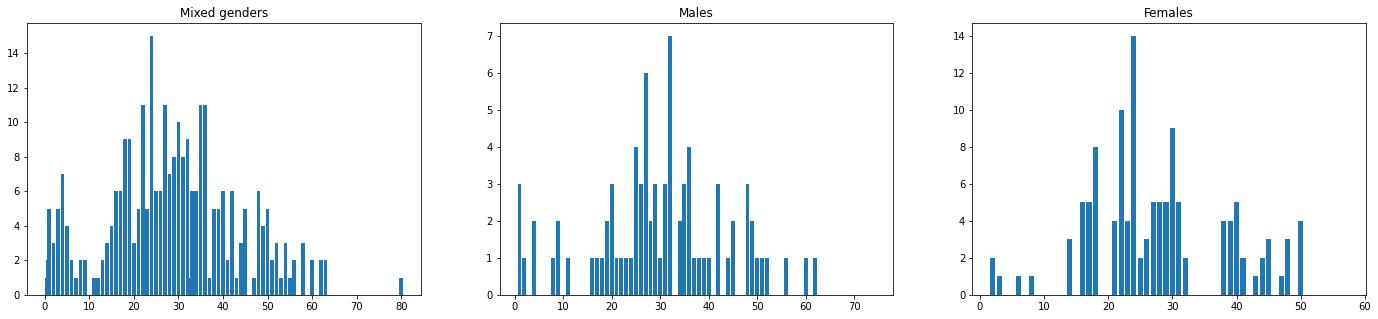

In [130]:
plt.figure(figsize=(24, 5))
plt.subplot(131)
plt.bar(agesMixedAlive, counterMixedAlive)
plt.title("Mixed genders")
plt.subplot(132)
plt.bar(ageMalesAlive, counterMaleAlive)
plt.title("Males")
plt.subplot(133)
plt.bar(ageFemaleAlive, counterFemaleAlive)
plt.title("Females")

The results are very interesting as they don't realy meet the expectations I had:

- Male passengers did survive from all ages, allthough I expected mostly kids, with some rare cases of adults (rich persons) to survive.
- It also looks like some passengers didn't get "captured" as "sum(counterMixed)" doesn't sum up to 891.
